In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#read data input
input_data = pd.read_csv("segment1.csv")
df = input_data.copy()
df = pd.DataFrame(df)
print(df)

      Unnamed: 0  segment               x1                        x2  \
0              0        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
1              1        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
2              2        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
3              3        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
4              4        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
...          ...      ...              ...                       ...   
1223        1223        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
1224        1224        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
1225        1225        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
1226        1226        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   
1227        1227        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1   

      duration  distance  weather  peak    date   time_x2  \
0          198       165        1     0  Sunday  13:39:59   
1          18

In [ ]:
#time_x1 column added
for i in range(len(df)):
  df.loc[i, "time_x1"] = (pd.to_datetime(df.loc[i, 'time_x2'],format= '%H:%M:%S' ) - timedelta(seconds=df.loc[i, "duration"].item()))
df["time_x1"] =df["time_x1"].dt.time


In [ ]:
#drop unnecessary columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
input_data = df.copy()
df.drop(columns=["segment", "x1", "x2", "duration", "distance", "weather", "peak", "driver", "time_x2"],inplace=True)

print(df)

        date   time_x1
0     Sunday  13:36:41
1     Sunday  13:36:51
2     Sunday  12:59:34
3     Sunday  12:59:34
4     Sunday  12:46:25
...      ...       ...
1223  Friday  22:13:57
1224  Friday  22:13:42
1225  Friday  22:13:42
1226  Friday  22:00:18
1227  Friday  22:00:18

[1228 rows x 2 columns]


<ipython-input-188-eff29c1d4eff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["segment", "x1", "x2", "duration", "distance", "weather", "peak", "driver", "time_x2"],inplace=True)


In [ ]:
#Normalize dataset
for i in range(len(df)):
  df.loc[i]["time_x1"] = df.loc[i]["time_x1"].hour * 3600 + df.loc[i]["time_x1"].minute * 60 + df.loc[i]["time_x1"].second
print(df)


        date time_x1
0     Sunday   49001
1     Sunday   49011
2     Sunday   46774
3     Sunday   46774
4     Sunday   45985
...      ...     ...
1223  Friday   80037
1224  Friday   80022
1225  Friday   80022
1226  Friday   79218
1227  Friday   79218

[1228 rows x 2 columns]


In [ ]:
#obtain array of values
data_array=df.values
#specify data types
data_array[:, 0:1] = data_array[:, 0:1].astype(str)
data_array[:, 1:] = data_array[:, 1::].astype(float)
print(data_array)

[['Sunday' 49001.0]
 ['Sunday' 49011.0]
 ['Sunday' 46774.0]
 ...
 ['Friday' 80022.0]
 ['Friday' 79218.0]
 ['Friday' 79218.0]]


In [ ]:
# divide array to 7 array
day_arrays = {'Monday': [], 'Tuesday': [], 'Wednesday': [], 'Thursday': [], 'Friday': [], 'Saturday': [], 'Sunday': []}

for row in data_array:
    day = row[0]  # Lấy ngày từ cột đầu tiên
    value = row[1]  # Lấy giá trị từ cột thứ hai
    day_arrays[day].append(value)
#sort array
monday_sorted_array = sorted(day_arrays['Monday'] )
#define global array
y_split = []
#function v-clustering

def v_clustering(L, threshold):
    def WAV(L1, L2):
        n = len(L)
        return (len(L1) / n) * np.var(L1) + (len(L2) / n) * np.var(L2)

    def delta_V(L, i):
        L1 = L[:i]
        L2 = L[i:]
        return np.var(L) - WAV(L1, L2)

    def find_best_split(L):
        max_delta_V = -1
        best_split_index = None

        for i in range(1, len(L)):
            delta_v = delta_V(L, i)

            if delta_v > max_delta_V:
                max_delta_V = delta_v
                best_split_index = i

        return best_split_index

    split_index = find_best_split(L)

    if split_index is None:
        return [L]

    L1 = L[:split_index]
    L2 = L[split_index:]
    if delta_V(L, split_index) < threshold :
        return [L]
    return v_clustering(L1, threshold) + v_clustering(L2, threshold)

# Example usage
actual_times = monday_sorted_array
threshold = 1000000
clusters = v_clustering(actual_times, threshold)

result_df = pd.DataFrame(columns=['Value', 'Cluster'])

for i, sub_array in enumerate(clusters):
    label = i + 1
    for element in sub_array:
        result_df = pd.concat([result_df, pd.DataFrame({'Value': [element], 'Cluster': [label]})], ignore_index=True)
mondays = input_data.loc[input_data['date'] == 'Monday']
mondays = mondays.sort_values(by=['time_x1'])
if (len(mondays) == len(result_df)):
  for i in range(len(mondays)):
    mondays['Cluster label'] = result_df['Cluster'].tolist()
mondays


,segment,x1,x2,duration,distance,weather,peak,date,time_x2,driver,time_x1,Cluster label
327,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,90,103,1,0,Monday,0:17:11,Rosmazlina binti Kahar,00:15:41,1
326,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,90,92,1,0,Monday,0:17:11,Norerizuan bin Othman,00:15:41,1
325,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,0,0,1,0,Monday,0:30:12,AHMAD FADHIL BIN ABD TALIB,00:30:12,1
324,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,131,193,1,0,Monday,0:34:05,ABDIN SHAKIRIN BIN AHMAD RAIS,00:31:54,1
323,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,131,182,1,0,Monday,0:34:05,Mohammad Asri bin Alimin,00:31:54,1
...,...,...,...,...,...,...,...,...,...,...,...,...
491,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,63,102,1,0,Monday,23:59:42,Mohammad Asri bin Alimin,23:58:39,19
331,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,166,148,1,0,Monday,0:01:43,Muhammad bin Mohd Noor,23:58:57,19
330,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,166,136,1,0,Monday,0:01:43,MOHD AMINUDDIN BIN HJ MOHD SAID AMRULLAH,23:58:57,19
328,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,67,144,1,0,Monday,0:00:10,Norerizuan bin Othman,23:59:03,19


In [ ]:
mondays_1 = mondays.loc[mondays['Cluster label'] == 1]
mondays_1 = mondays_1.sort_values(by=['duration'])
thresholdd = 100
clusters = v_clustering(mondays_1['duration'].tolist(), thresholdd)

result_df = pd.DataFrame(columns=['Value', 'Cluster'])
for i, sub_array in enumerate(clusters):
    label = i + 1
    for element in sub_array:
        result_df = pd.concat([result_df, pd.DataFrame({'Value': [element], 'Cluster': [label]})], ignore_index=True)
if (len(mondays_1) == len(result_df)):
  for i in range(len(mondays_1)):
    mondays_1['Cluster label for duration'] = result_df['Cluster'].tolist()
mondays_1

,segment,x1,x2,duration,distance,weather,peak,date,time_x2,driver,time_x1,Cluster label,Cluster label for duration
325,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,0,0,1,0,Monday,0:30:12,AHMAD FADHIL BIN ABD TALIB,00:30:12,1,1
327,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,90,103,1,0,Monday,0:17:11,Rosmazlina binti Kahar,00:15:41,1,2
326,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,90,92,1,0,Monday,0:17:11,Norerizuan bin Othman,00:15:41,1,2
320,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,111,136,1,0,Monday,0:46:32,Norerizuan bin Othman,00:44:41,1,3
319,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,111,124,1,0,Monday,0:46:32,ABD JABAR BIN KASSIM,00:44:41,1,3
316,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,123,101,1,0,Monday,1:02:13,MURAD BIN TUMIN,01:00:10,1,3
315,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,123,91,1,0,Monday,1:02:13,MURAD BIN TUMIN,01:00:10,1,3
324,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,131,193,1,0,Monday,0:34:05,ABDIN SHAKIRIN BIN AHMAD RAIS,00:31:54,1,3
323,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,131,182,1,0,Monday,0:34:05,Mohammad Asri bin Alimin,00:31:54,1,3
318,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,151,144,1,0,Monday,1:01:42,MOHAMED FARIS BIN ISMAIL,00:59:11,1,4


[200000, 190000, 180000, 170000, 160000, 150000, 140000, 130000, 120000, 110000, 100000, 90000, 80000, 70000, 60000, 50000, 40000, 30000, 20000, 10000]


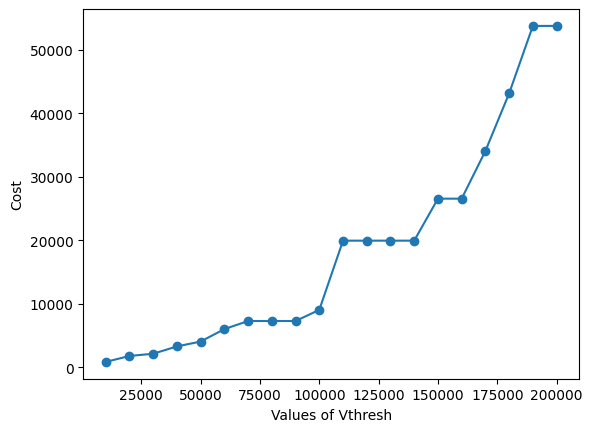

In [ ]:
#Tunning Vthresh
thresholds = []
value = []
for i in range(20, 0, -1):
  thresholds.append(i*10000)
print(thresholds)
for threshold in thresholds:
  clusters = v_clustering(actual_times, threshold)
  sum = 0
  for i in clusters:
    sum += np.var(i)
    cost = sum/len(clusters)
  value.append(cost)

plt.plot(thresholds, value)
plt.scatter(thresholds, value)
plt.xlabel("Values of Vthresh")
plt.ylabel("Cost")
plt.show()